In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
from astropy.io import fits
%matplotlib inline


GPU acceleration enabled
using given n: 0
Starting SourceModule Code
Past the SourceModule code
CUDAC Available


In [2]:
f = ppy.instrument.default_m31_filters()

In [3]:
iso_model = ppy.isochrones.Isochrone_Model(f)

In [4]:
driv = ppy.driver.Driver(iso_model)

In [6]:
agemodel = ppy.agemodels.NonParam()
agemodel.update_edges(np.array([6.0, 8.0, 9.0, 9.5, 10.0, 10.2]))

tau_model = ppy.agemodels.TauModel(iso_step=-1)
tau_model.iso_edges = np.array([6.0, 8.0, 9.0, 9.5, 10.0, 10.2])
tau_model.set_params(np.array([2.258, 2.8205]))

tau_SFH = list(np.log10(tau_model.SFH))

gal = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.2),
    ppy.dustmodels.SingleDust(),
    agemodel,
    ppy.distancemodels.VariableDistance()
)
gal.set_params(np.array([0.1676, -1.8033] + tau_SFH + [24.42]))

In [8]:
pcmd = driv.simulate(gal, 512, shot_noise=True)[0]

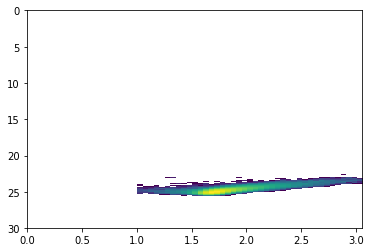

In [18]:
bins = [np.arange(20, 30, 0.05), np.arange(1, 3.1, 0.05)]
ppy.plotting.plot_pcmd(pcmd, bins=bins);